MSE: 523.8483050470502
R² score: 0.420289397011973


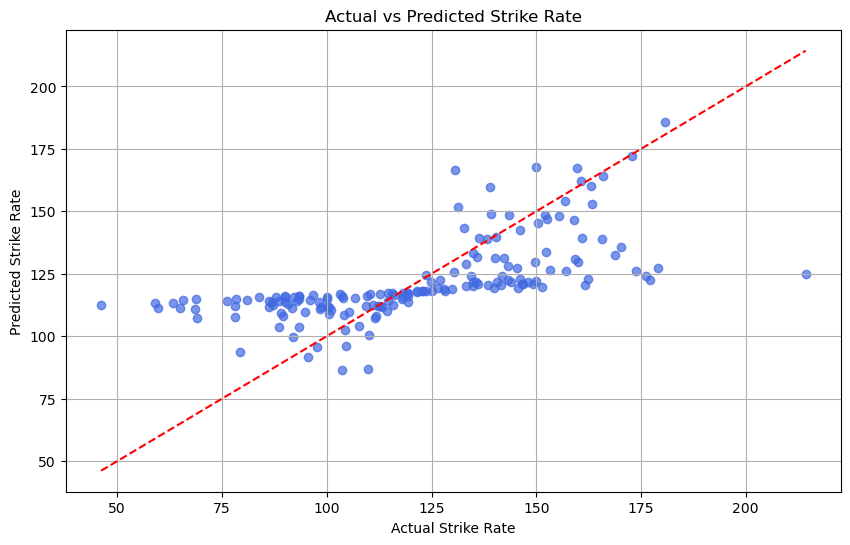

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"C:\Sakha Internship\archive\deliveries.csv")

def find_phase(over):
    if 0<= over<=6:
        return 'Power Play'
    if 7<= over <=13:
        return 'Middle Overs'
    if 14<= over <= 20:
        return 'Death Over'
    
    return None


data['phase'] = data['over'].apply(find_phase)


batsmen_stats = data.groupby(['batter', 'phase']).agg({
    'batsman_runs':'sum',
    'ball':'count'
}).reset_index()

batsmen_stats['strike_rate'] = (batsmen_stats['batsman_runs'] / batsmen_stats['ball']) *(100)

batsmen_stats = batsmen_stats[batsmen_stats['ball'] >= 30]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report

x = batsmen_stats[['batsman_runs', 'ball']]
y = batsmen_stats['strike_rate']


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² score:", model.score(x_test, y_test))

import matplotlib.pyplot as plt


# Plotting the actual vs predicted strike rates
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Strike Rate')
plt.ylabel('Predicted Strike Rate')
plt.title('Actual vs Predicted Strike Rate')
plt.grid(True)
plt.show()